# Visualization of GoBike Trip Data
## by Ching-Shun Chan

## Overview

In this dataset exploration, I am going to find out some business valuable insights based on the GoBike trip data. The user behavior and tendency based on their characteristics such as gender/age/user type.

This data set contains `3,308,432` records with `17` data fields on each records, including start/end station id/location, start/end time. duration, gender, user type (Customer or Subscriber) and so on.

In [1]:
# Import all necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
%matplotlib inline

Here are data fields that we have.

In [2]:
df = pd.read_excel('Gobike_dataset.xlsx')
df.head(1)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_name,start_time,user_type,Age,start_time_month,start_time_day,start_time_hour,end_time_hour,duration_min,distance_km
0,3571,No,453,134.0,37.752428,-122.420628,Valencia St at 24th St,2018-02-01 00:01:26.805,1988.0,Male,...,17th & Folsom Street Park (17th St at Folsom St),2018-01-31 23:53:53.632,Subscriber,31.0,Jan,Wednesday,23,0,7.55,1.340181


### Insight 1:
##### For short riding within 20 mins, most subscriber users tend to have less duration compared to customer type users. From the violin plot, it is observed that subscribers tend to end their trips within 3~9 minutes obviously.

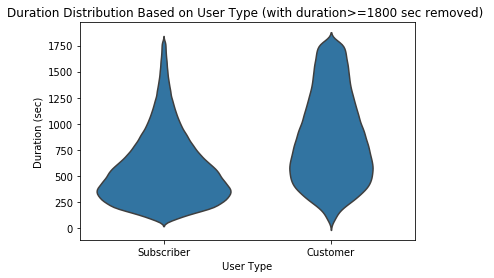

In [3]:
# Remove duration >= 1800
df_temp = df.loc[df.duration_sec<1800]

base_color = sns.color_palette()[0]
sns.violinplot(data=df_temp, x='user_type', y='duration_sec', aspect=15/8, color=base_color, inner=None, height=12)

ax = plt.gca()
ax.set_ylabel('Duration (sec)')
ax.set_xlabel('User Type')
ax.set_title('Duration Distribution Based on User Type (with duration>=1800 sec removed) ', fontsize=12);

### Insight 2:
##### Most of users are Male. Both male and female users present similar trend of ride counts.

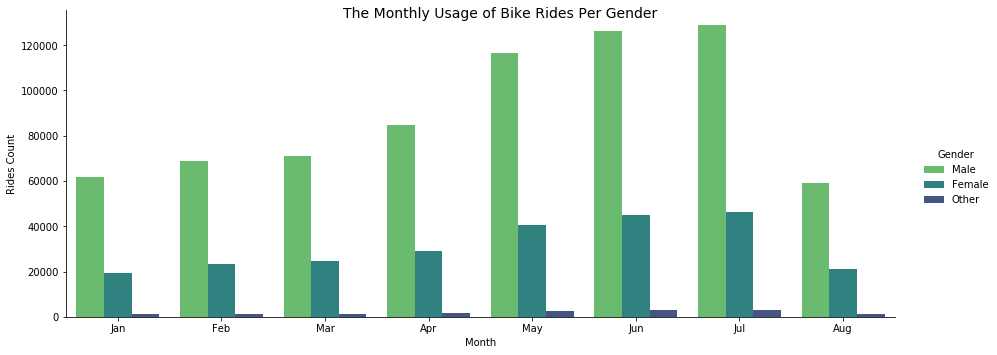

In [4]:
lm = sns.catplot(data=df, x='start_time_month', hue='member_gender', kind='count',aspect=20/8, color=base_color,palette='viridis_r')

lm.set_axis_labels('Month', 'Rides Count')
lm._legend.set_title('Gender')
lm.fig.suptitle('The Monthly Usage of Bike Rides Per Gender', fontsize=14);

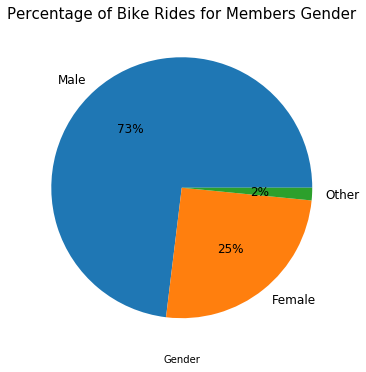

In [5]:
df.member_gender.value_counts().plot(kind='pie', figsize=(6,6),fontsize=12, autopct='%1.0f%%')
ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel('Gender')
ax.set_title("Percentage of Bike Rides for Members Gender", fontsize=15);

### Insight 3:
##### For subscriber, the daily usage of GoBike is reduced at Saturday and Sunday, whereas customer Gobike usage is stable.

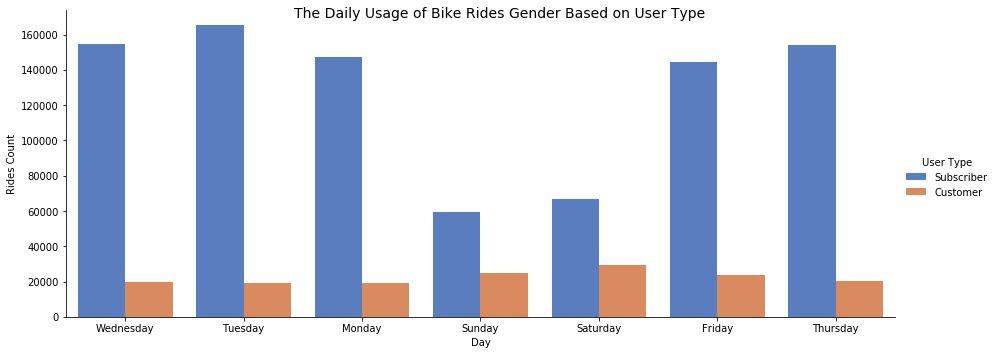

In [6]:
lm = sns.catplot(data=df, x='start_time_day', hue='user_type', kind='count',aspect=20/8, color=base_color,palette='muted')

lm.set_axis_labels('Day', 'Rides Count')
lm._legend.set_title('User Type')
lm.fig.suptitle('The Daily Usage of Bike Rides Gender Based on User Type', fontsize=14);

##### However, for monthy trend, the customer type users usage is comparable to subscriber. Their trends are similar.

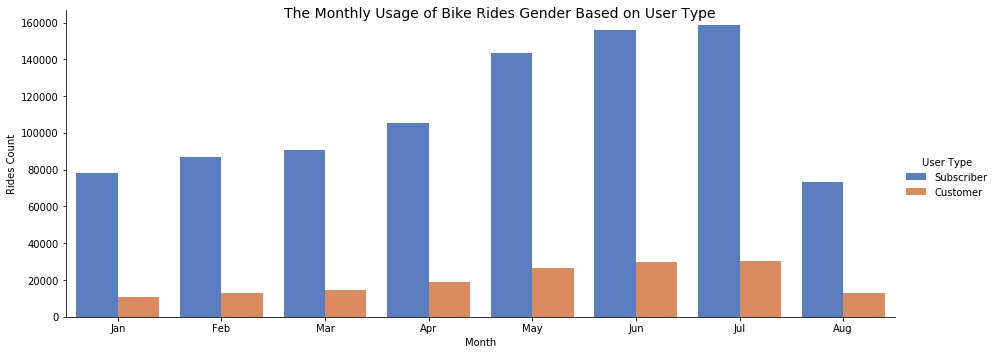

In [7]:
lm = sns.catplot(data=df, x='start_time_month', hue='user_type', kind='count',aspect=20/8, color=base_color,palette='muted')

lm.set_axis_labels('Month', 'Rides Count')
lm._legend.set_title('User Type')
lm.fig.suptitle('The Monthly Usage of Bike Rides Gender Based on User Type', fontsize=14);

### Insight 4:
##### Customers tend to spend more time on riding GoBike in average.

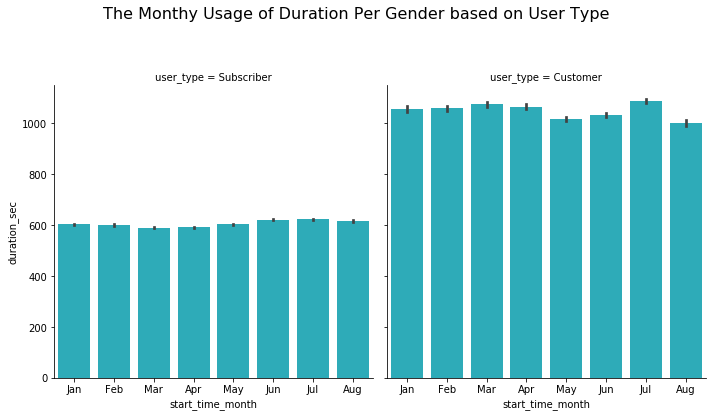

In [8]:
base_color = sns.color_palette()[9]
ax = sns.catplot('start_time_month', 'duration_sec', col='user_type', data=df, kind='bar', color=base_color)
ax.fig.suptitle('The Monthy Usage of Duration Per Gender based on User Type', fontsize=16, y=1.15);

#### But for average distance, there is no obvious difference between subscribers and customers.

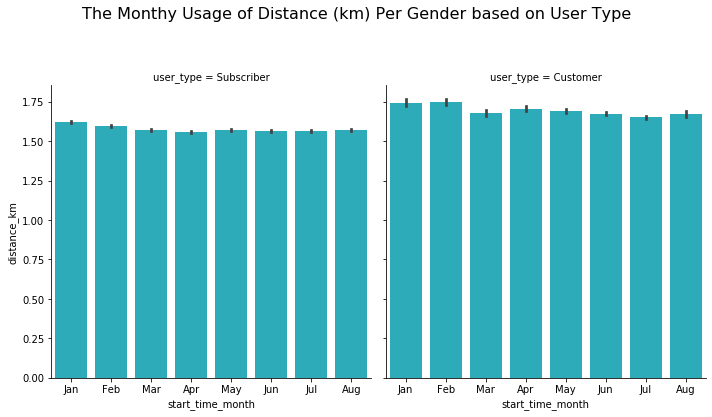

In [9]:
base_color = sns.color_palette()[9]
ax = sns.catplot('start_time_month', 'distance_km', col='user_type', data=df, kind='bar', color=base_color)
ax.fig.suptitle('The Monthy Usage of Distance (km) Per Gender based on User Type', fontsize=16, y=1.15);